In [1]:
#Naive Bayes Using BOW 

In [2]:
#pip install spacy--Had to run because attribute error

In [3]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'whitegrid', context = 'paper', font = 'Georgia', palette = 'Set3')

In [4]:
df = pd.read_csv('E:/Downloads/DataSets/SMS spam', sep = '\t', header = None, names=['Labels','SMS'])
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Labels'].value_counts()

ham     4825
spam     747
Name: Labels, dtype: int64

In [6]:
#df['Labels'].replace({'ham':0,'spam':1}, inplace = True)

In [7]:
df['Spam'] = df['Labels'].apply(lambda x : 1 if x == 'spam' else  0)

In [8]:
df['Spam'].value_counts()

0    4825
1     747
Name: Spam, dtype: int64

In [9]:
df.shape

(5572, 3)

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Subhash
[nltk_data]     Ranga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
vader = SentimentIntensityAnalyzer()
df['pos'] = [vader.polarity_scores(i)['pos'] for i in df['SMS']]
df['neg'] = [vader.polarity_scores(i)['neg'] for i in df['SMS']]
df['neu'] = [vader.polarity_scores(i)['neu'] for i in df['SMS']]

In [12]:
from wordcloud import WordCloud, STOPWORDS

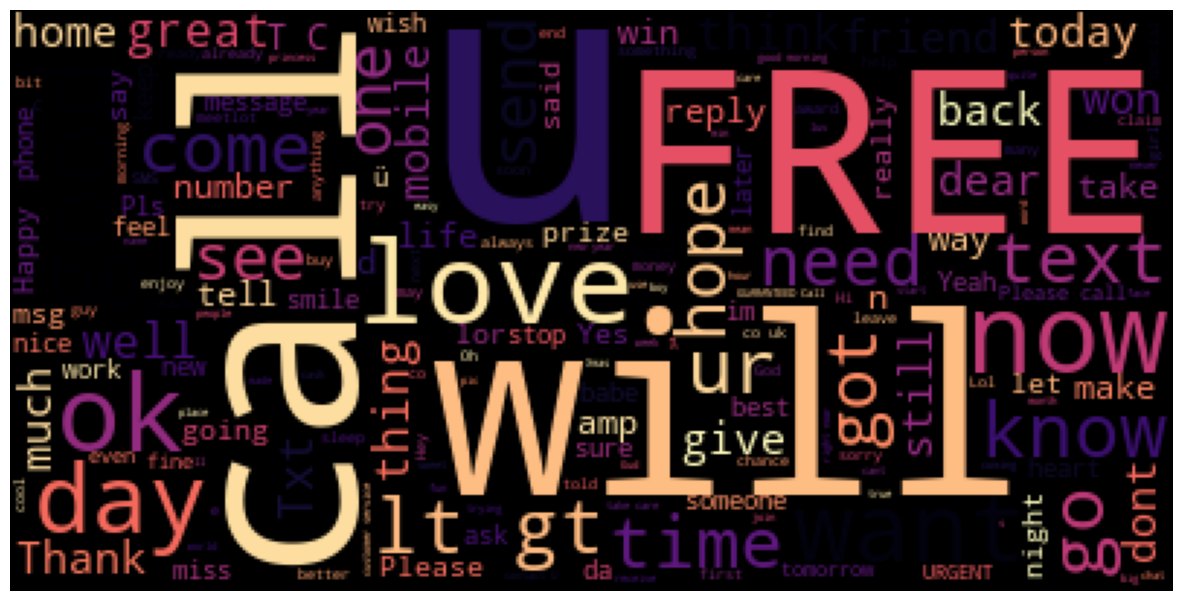

In [13]:
text_pos = ''.join([i for i in df['SMS'][df['pos']>df['neg']]])
wordcloud_pos = WordCloud(stopwords= set(STOPWORDS),include_numbers = False, colormap = 'magma' ).generate(text_pos)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

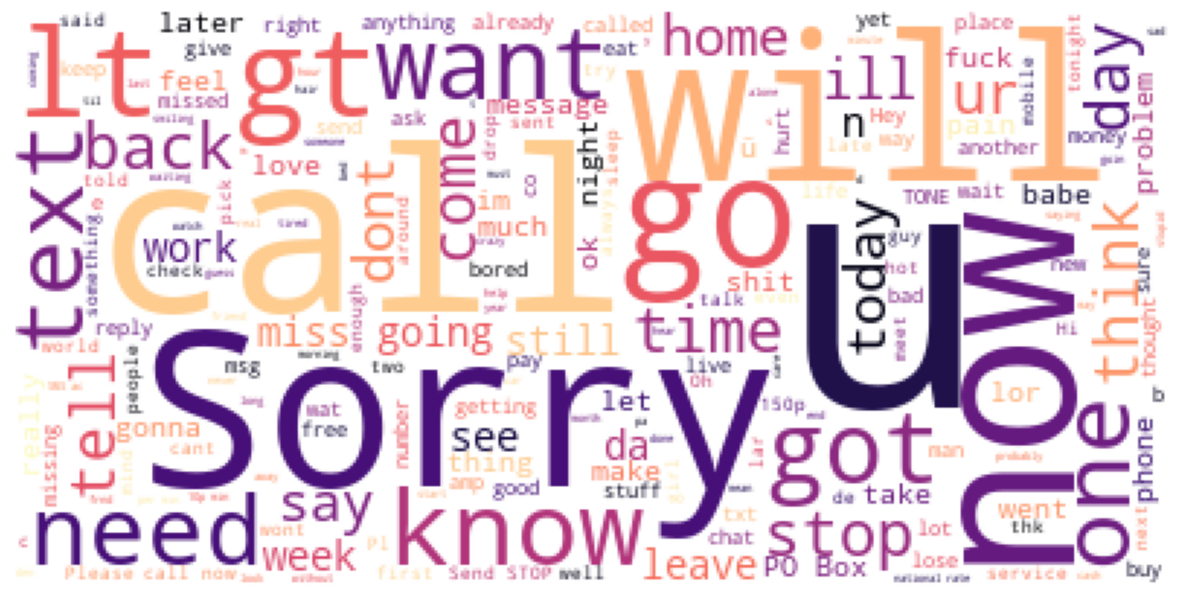

In [14]:
text_neg = ''.join([i for i in df['SMS'][df['pos']<df['neg']]])
wordcloud_neg = WordCloud(stopwords= set(STOPWORDS), background_color = 'white', colormap = 'magma').generate(text_neg)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

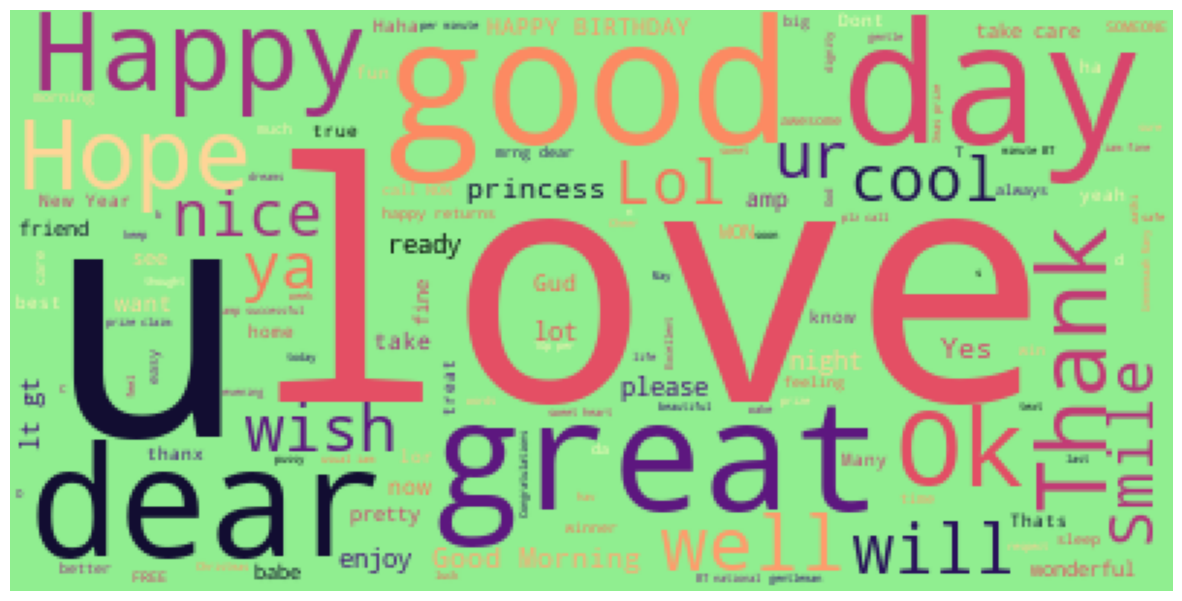

In [15]:
text_neu = ''.join(df.loc[(df['pos'] > df['neu']) & (df['neu'] > df['neg']), 'SMS'])
wordcloud_neu = WordCloud(stopwords= set(STOPWORDS), background_color = 'lightgreen', colormap = 'magma').generate(text_neu)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud_neu)
plt.axis('off')
plt.show()

In [16]:
#--UDF for cleaning text data
import re
def clean_text(text):
    # Remove URLs (https, www)
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords (assuming you have a list of stopwords)
    stopwords = set(STOPWORDS)
    words = text.split()
    words = [word for word in words if word.lower() not in stopwords]
    text = ' '.join(words)
    
    # Remove extra whitespace and punctuation
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Removes websites
    
    # Convert to lowercase
    text = text.lower()
    
    return text

In [17]:
'''
import re
def clean(text):
    text = re.sub(r'www\S+|https\S+|\s+|[^\w]|\d+|\S+@\S+', ' ',text)
    stopwords = set(STOPWORDS)
    words = text.split()
    words = [word for word in words if word.lower() not in stopwords]
    text = ' '.join(words)
    
    text = text.lower()
    
    return text
    
    
df['SMS dummy clean'] = df['SMS'].apply(clean)
    '''

"\nimport re\ndef clean(text):\n    text = re.sub(r'www\\S+|https\\S+|\\s+|[^\\w]|\\d+|\\S+@\\S+', ' ',text)\n    stopwords = set(STOPWORDS)\n    words = text.split()\n    words = [word for word in words if word.lower() not in stopwords]\n    text = ' '.join(words)\n    \n    text = text.lower()\n    \n    return text\n    \n    \ndf['SMS dummy clean'] = df['SMS'].apply(clean)\n    "

In [18]:
df['SMS Clean'] = df['SMS'].apply(clean_text)

In [19]:
df['SMS Clean']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact u u won  pound prize cla...
5568                     will ü b going esplanade fr home
5569                    pity  mood that soany suggestions
5570    guy bitching acted interested buying something...
5571                                       rofl true name
Name: SMS Clean, Length: 5572, dtype: object

In [20]:
df['SMS']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: SMS, Length: 5572, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample texts (replace with your own corpus)
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get feature names (words/terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array for inspection (optional)
tfidf_matrix_dense = tfidf_matrix.toarray()

# Print the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix)

# Print the feature names (terms)
print("\nFeature Names (Terms):")
print(feature_names)


TF-IDF Matrix:
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483

Feature Names (Terms):
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [22]:
X = TfidfVectorizer().fit_transform(df['SMS Clean'])

In [23]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,df['Spam'],test_size = 0.30)

In [24]:
'''
X_train_tf = TfidfVectorizer().fit_transform(X_train)
x_test_tf = TfidfVectorizer().fit_transform(x_test)
'''

'\nX_train_tf = TfidfVectorizer().fit_transform(X_train)\nx_test_tf = TfidfVectorizer().fit_transform(x_test)\n'

In [25]:
'''
X_train_tf
x_test_tf
'''

'\nX_train_tf\nx_test_tf\n'

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
model = MultinomialNB().fit(X_train,Y_train)

In [29]:
y_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

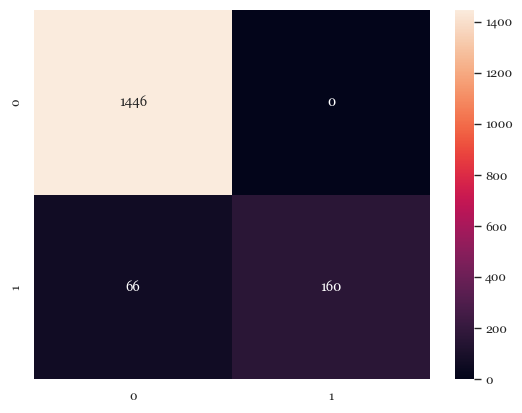

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, fmt = 'd')
plt.show()

In [33]:
print(f'Classification Report : \n {classification_report(y_test,y_pred)}')

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1446
           1       1.00      0.71      0.83       226

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

